In [20]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

nltk.download('punkt') # if necessary...


stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


train= pd.read_csv('train.csv',usecols=['text'])
for i in range(len(train['text'])-1):
#     if cosine_sim(train['text'][0],train['text'][i+1])>0.5:
        print("Similarity between",'3',i+1,"is ",cosine_sim(train['text'][0],train['text'][i+1]))


Similarity betwee  3 1 is  0.22360979743739498
Similarity betwee  3 2 is  0.06372863817024925
Similarity betwee  3 3 is  0.12083223046959847
Similarity betwee  3 4 is  0.11674195505235431
Similarity betwee  3 5 is  0.1664835026508439
Similarity betwee  3 6 is  0.20064995690540435
Similarity betwee  3 7 is  0.18309871652352303
Similarity betwee  3 8 is  0.2095424038071012
Similarity betwee  3 9 is  0.05519779288412597


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 't

Similarity between 3 1 is  0.12083223046959847
Similarity between 3 2 is  0.4382448562579034
Similarity between 3 3 is  0.2744855626243865
Similarity between 3 4 is  1.0
Similarity between 3 5 is  0.37823863689333515
Similarity between 3 6 is  0.06980811278444463
Similarity between 3 7 is  0.19438588123750367
Similarity between 3 8 is  0.11743956657713242
Similarity between 3 9 is  0.15592892548708362


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


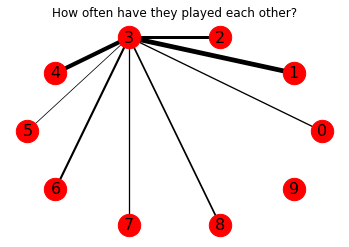

In [30]:
#1. Import pyplot and nx
import matplotlib.pyplot as plt
import networkx as nx
 
def plot_weighted_graph():
    "Plot a weighted graph"
 
    #2. Add nodes
    G = nx.Graph() #2 a graph object called G
    node_list = ['0','1','2','3','4','5','6','7','8','9']
    for node in node_list:
        G.add_node(node)
 
    #Note: You can also try a spring_layout
    pos=nx.circular_layout(G) 
    nx.draw_networkx_nodes(G,pos,node_color='red',node_size=500)
 
    #3. If you want, add labels to the nodes
    labels = {}
    for node_name in node_list:
        labels[str(node_name)] =str(node_name)
    nx.draw_networkx_labels(G,pos,labels,font_size=16)
 
    #4. Add the edges (4C2 = 6 combinations)
    #NOTE: You usually read this data in from some source
    #To keep the example self contained, I typed this out
    for i in range(0,len(train['text'])-1):
#     if cosine_sim(train['text'][0],train['text'][i+1])>0.5:
        print("Similarity between",'3',i+1,"is ",cosine_sim(train['text'][3],train['text'][i]))
        G.add_edge(node_list[3],node_list[i],weight=cosine_sim(train['text'][3],train['text'][i]))
 
    all_weights = []
    #4 a. Iterate through the graph nodes to gather all the weights
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
 
    #4 b. Get unique weights
    unique_weights = list(set(all_weights))
 
    #4 c. Plot the edges - one by one!
    for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = weight*len(node_list)*3.0/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
 
    #Plot the graph
    plt.axis('off')
    plt.title('How often have they played each other?')
    plt.savefig("chess_legends.png") 
    plt.show() 
#----START OF SCRIPT
if __name__=='__main__':
    plot_weighted_graph()